In [18]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd  # For data handling and manipulation
import numpy as np   # For numerical operations

# Importing libraries for visualizing data
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns            # For making statistical graphics

# Preparing data for modeling
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder, label_binarize, MinMaxScaler  # For encoding and scaling data

# Selecting relevant features from the dataset
from sklearn.feature_selection import mutual_info_classif  # For estimating the mutual information between features and labels

# Implementing classification algorithms
from sklearn.multiclass import OneVsRestClassifier  # For handling multi-class classification
from sklearn.ensemble import RandomForestClassifier   # For building a random forest model

# Importing metrics for evaluating model performance
from sklearn.metrics import (balanced_accuracy_score, f1_score, precision_score, recall_score,
                               classification_report, confusion_matrix,
                               ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score)  # For assessing classification results


In [13]:
# Specify the local file path
file_path = r'E:\Github Projects\Cancer-Prediction-System\datasets\cancer_gene_expression.csv'

# Read the CSV file into a DataFrame
dataframe = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(dataframe.head())
print(dataframe.shape)
print(dataframe.columns[0:3])

   gene_1  gene_2  gene_3    gene_4  gene_5  gene_6  gene_7  gene_8    gene_9  \
0     0.0     0.0     0.0  2.088413     0.0     0.0     0.0     0.0  0.550605   
1     0.0     0.0     0.0  3.205955     0.0     0.0     0.0     0.0  0.425244   
2     0.0     0.0     0.0  4.746646     0.0     0.0     0.0     0.0  2.639417   
3     0.0     0.0     0.0  1.173191     0.0     0.0     0.0     0.0  1.527371   
4     0.0     0.0     0.0  1.366532     0.0     0.0     0.0     0.0  0.000000   

    gene_10  ...  gene_7992  gene_7993  gene_7994  gene_7995  gene_7996  \
0  2.815760  ...  11.558803   8.881802   6.014840   6.643534  11.740624   
1  2.354396  ...  11.062829   9.032864   5.054193   6.432320  12.104985   
2  1.657091  ...  12.497640   7.198160   0.943434   7.371690  11.202356   
3  2.732899  ...  11.261713   8.725676   6.300418   6.036451  11.732303   
4  3.388355  ...  12.241965   7.685204   5.142948   6.355788  11.493950   

   gene_7997  gene_7998  gene_7999  gene_8000  Cancer_Type  
0

In [22]:
# Print column names each on a new line
print("\n".join(dataframe.columns))

gene_1
gene_2
gene_3
gene_4
gene_5
gene_6
gene_7
gene_8
gene_9
gene_10
gene_11
gene_12
gene_13
gene_14
gene_15
gene_16
gene_17
gene_18
gene_19
gene_20
gene_21
gene_22
gene_23
gene_24
gene_25
gene_26
gene_27
gene_28
gene_29
gene_30
gene_31
gene_32
gene_33
gene_34
gene_35
gene_36
gene_37
gene_38
gene_39
gene_40
gene_41
gene_42
gene_43
gene_44
gene_45
gene_46
gene_47
gene_48
gene_49
gene_50
gene_51
gene_52
gene_53
gene_54
gene_55
gene_56
gene_57
gene_58
gene_59
gene_60
gene_61
gene_62
gene_63
gene_64
gene_65
gene_66
gene_67
gene_68
gene_69
gene_70
gene_71
gene_72
gene_73
gene_74
gene_75
gene_76
gene_77
gene_78
gene_79
gene_80
gene_81
gene_82
gene_83
gene_84
gene_85
gene_86
gene_87
gene_88
gene_89
gene_90
gene_91
gene_92
gene_93
gene_94
gene_95
gene_96
gene_97
gene_98
gene_99
gene_100
gene_101
gene_102
gene_103
gene_104
gene_105
gene_106
gene_107
gene_108
gene_109
gene_110
gene_111
gene_112
gene_113
gene_114
gene_115
gene_116
gene_117
gene_118
gene_119
gene_120
gene_121
gene_122
gene_123
g

In [27]:

# Step 1: Check for missing values
datanul = dataframe.isnull().sum()
# Filter columns with missing values
columns_with_missing_values = [col for col in datanul.index if datanul[col] > 0]

# Print the count of columns with missing values
print('Columns with missing values: %d' % len(columns_with_missing_values))

# Optionally, print the names of those columns
print('Columns with missing values:', columns_with_missing_values)

# Step 2: Loop through all columns and check for features and targets
# Assuming all columns are features except the last one, change as needed
features = dataframe.drop(columns=columns_with_missing_values)  # drop target columns with missing values
targets = columns_with_missing_values  # Use columns with missing values as targets

# Create a dictionary to hold combined DataFrames
combined_dataframes = {}

# Step 3: Combine features with each target and drop rows with missing values
for target in targets:
    combined = pd.concat([features, dataframe[target]], axis=1)
    combined = combined.dropna()  # Drop rows with missing values
    combined_dataframes[target] = combined  # Store the combined DataFrame in a dictionary

    # Print the shape of the combined DataFrame after dropping missing values
    print(f'Shape of combined DataFrame for target "{target}":', combined.shape)

# If needed, you can access a specific combined DataFrame like this:
# specific_combined = combined_dataframes['some_target_column']


Columns with missing values: 0
Columns with missing values: []


In [26]:
print(dataframe['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


Data Preprocessing


In [45]:
# Assuming dataframe is already loaded
X = dataframe.iloc[:, :-1]  # All rows, all columns except the last
y = dataframe.iloc[:, -1]    # All rows, only the last column

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert categorical labels to numeric
labels=label_encoder.classes_
classes=np.unique(y_encoded)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale data between 0 and 1 using Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)  # Fit and transform training data
X_test_norm = min_max_scaler.transform(X_test)  # Transform test data based on the training data scaler


In [46]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (640, 8000)
Shape of X_test: (161, 8000)
Shape of y_train: (640,)
Shape of y_test: (161,)


Feature Selection

In [47]:
# Calculate mutual information scores
MI = mutual_info_classif(X_train_norm, y_train)

# Specify the number of features you want to select
n_features = 300

# Get the indices of the top n_features based on mutual information scores
selected_scores_indices = np.argsort(MI)[::-1][:n_features]

# Select the features from the normalized training and test datasets
X_train_selected = X_train_norm[:, selected_scores_indices]
X_test_selected = X_test_norm[:, selected_scores_indices]

# Check the shapes of the selected feature sets
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)



Shape of X_train_selected: (640, 300)
Shape of X_test_selected: (161, 300)


Model Training

In [48]:
#Random Forest Classifier
#because we are dealing with multiclass data, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred =RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

In [52]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9439
precision:0.9637
recall:0.9627
f1score:0.9623


classification report


              precision    recall  f1-score   support

        BRCA       0.94      1.00      0.97        60
        COAD       1.00      0.88      0.93        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.91      0.88      0.89        24
        PRAD       1.00      0.97      0.98        33

    accuracy                           0.96       161
   macro avg       0.97      0.94      0.96       161
weighted avg       0.96      0.96      0.96       161



      BRCA  COAD  KIRC  LUAD  PRAD
BRCA    60     0     0     0     0
COAD     0    14     0     2     0
KIRC     0     0    28     0     0
LUAD     3     0     0    21     0
PRAD     1     0     0     0    32


Text(50.722222222222214, 0.5, 'True Labels')

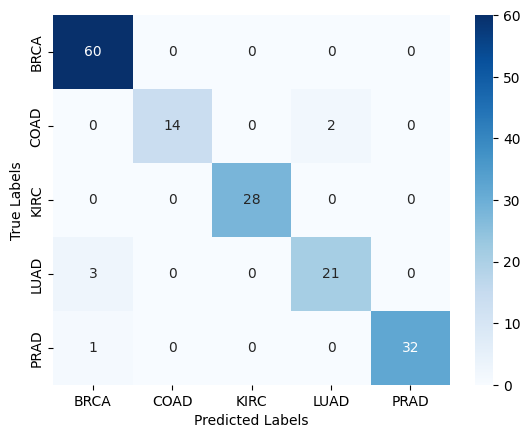

In [56]:
#generate confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)
print(cm_df)

#visualize the confusion matrix using seaborn

sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')